In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv(r'C:\Users\nico_\Desktop\Time series\UDEMY_TSA_FINAL\UDEMY_TSA_FINAL\Data\HospitalityEmployees.csv', index_col='Date', parse_dates=True)

In [28]:
df.index.freq='MS'

In [30]:
df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


In [61]:
df.shape

(348, 1)

In [34]:
df.isna().sum()

Employees    0
dtype: int64

# Plot

[Text(0.5, 0, 'date'), Text(0, 0.5, 'Thousands of persons')]

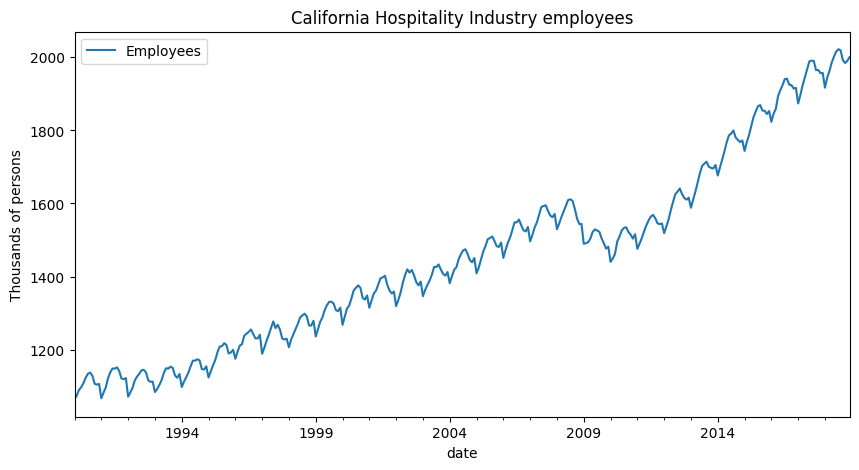

In [40]:
ax = df.plot(figsize=(10,5), title='California Hospitality Industry employees')
ax.set(xlabel='date',ylabel='Thousands of persons')

# Seasonal decompose

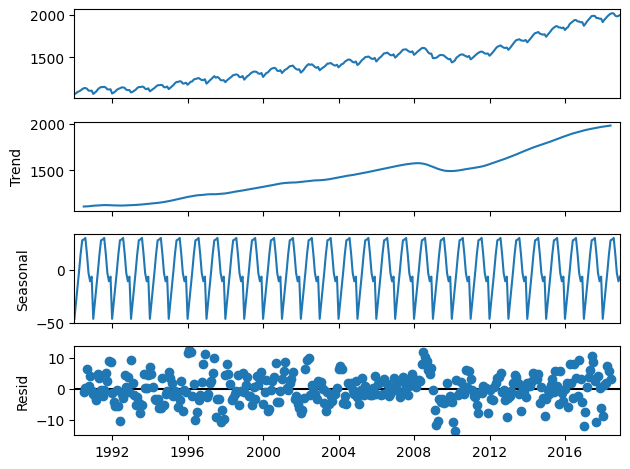

In [50]:
result = seasonal_decompose(df)
result.plot();

### Tendance à la hausse, non stationnaire, saisonnalité

# Model and parameters

In [56]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 28 Mar 2025   AIC                           2208.504
Time:                                      11:09:05   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9243      0.045     20.576      0.000       0.836       1.012
ma.L1         -0.9439      0.070    -13.453      0.000      -1.081      -0.806
ma.L2          0.1289      0.060      2.143      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    705.040      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.319      0.000      -0.834      -0.664
sigma2        29.2950      1.716     17.067      0.000      25.931      32.659
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Modèle SARIMA avec order p=1,d=1,q=2 et P=1 et seasonal order P=1, D=0, Q=1 [12]

# Prédiction des 12 prochains mois donc test = 12

## Train/test

In [68]:
train=df.iloc[:len(df)-12]
test=df.iloc[len(df)-12:]

## SARIMA Model training

In [78]:
model = SARIMAX(train['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Fri, 28 Mar 2025   AIC                           2128.116
Time:                                      11:20:51   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.256      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.624      0.000      -1.096      -0.820
ma.L2          0.1497      0.061      2.452      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    726.719      0.000       0.995       1.000
ma.S.L12      -0.7518      0.044    -17.151      0.000      -0.838      -0.666
sigma2        28.7688      1.685     17.076      0.000      25.467      32.071
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Test prediction

In [83]:
start = len(train)
end = len(train) + len(test) -1

In [87]:
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) predictions')

## Plot predictions

[Text(0.5, 0, 'date'), Text(0, 0.5, 'Thousands of persons')]

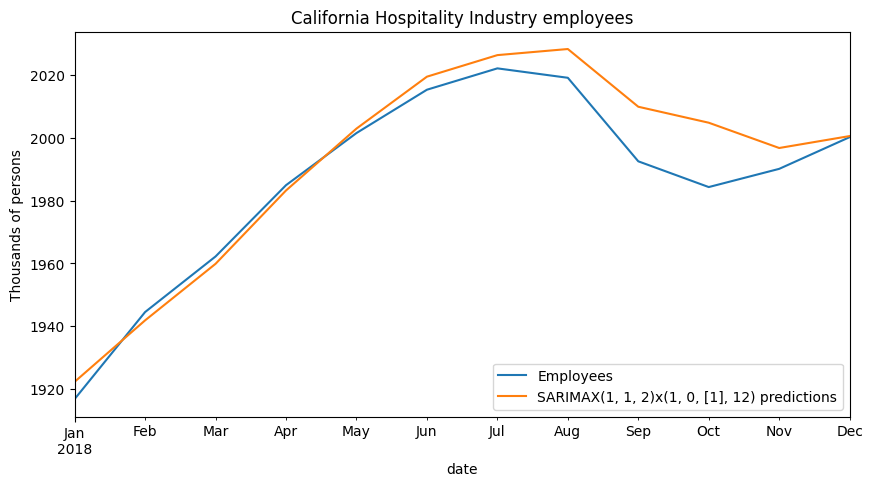

In [90]:
ax = test['Employees'].plot(figsize=(10,5),legend=True ,title='California Hospitality Industry employees')
predictions.plot(legend=True)
ax.set(xlabel='date',ylabel='Thousands of persons')

## Evaluate the model using MSE and RMSE

In [97]:
error1 = mean_squared_error(test['Employees'],predictions)
error2 = rmse(test['Employees'],predictions)

print(f' MSE : {error1}')
print(f' RMSE : {error2}')

 MSE : 77.71980622961782
 RMSE : 8.815883746376073


In [101]:
mean = test['Employees'].mean()
mean

1986.125

In [105]:
tx = error2*100/mean
tx

0.4438735601422908

### Erreur de plus ou moins 0.44%

# Forecast of next 12 months

In [110]:
model = SARIMAX(df['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Fri, 28 Mar 2025   AIC                           2208.504
Time:                                      11:38:22   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9243      0.045     20.576      0.000       0.836       1.012
ma.L1         -0.9439      0.070    -13.453      0.000      -1.081      -0.806
ma.L2          0.1289      0.060      2.143      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    705.040      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.319      0.000      -0.834      -0.664
sigma2        29.2950      1.716     17.067      0.000      25.931      32.659
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.42
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
forecast = results.predict(start=len(df), end=len(df)+11, typ='level').rename('SARIMAX(1, 1, 2)x(1, 0, [1], 12) Forecast')

[Text(0.5, 0, 'date'), Text(0, 0.5, 'Thousands of persons')]

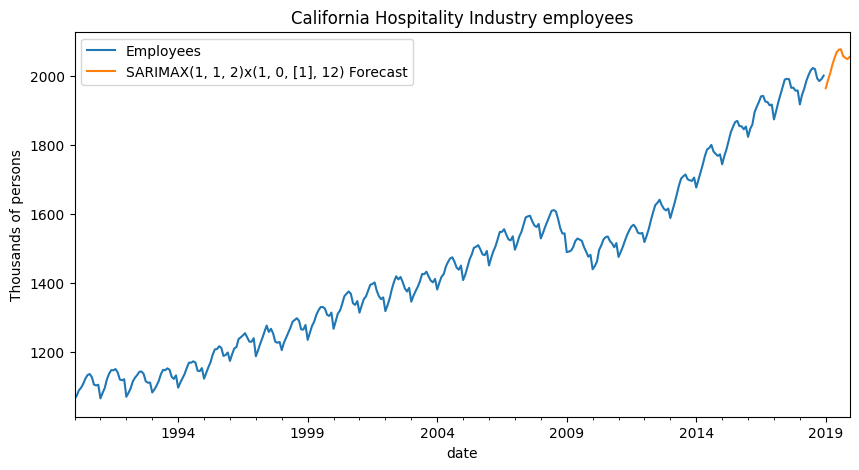

In [116]:
ax = df['Employees'].plot(figsize=(10,5),legend=True ,title='California Hospitality Industry employees')
forecast.plot(legend=True)
ax.set(xlabel='date',ylabel='Thousands of persons')